# Data Science Project: Analyze Iris Dataset

## Task 1: Utilize the Iris Dataset to perform a data science task.

- Implement a basic data science task using the Iris dataset.
- This task aims to predict flowers based on their unique characteristics.
- Choose and implement an appropriate machine learning algorithm (e.g.,Decision Trees, Logistic Regression).
- Split the dataset into training and testing sets for model evaluation.
- Train the model on the training set and evaluate its performance on the testing set.
- Utilize metrics such as accuracy, precision, and recall for model evaluation.

### Importing Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
iris_df = pd.read_csv('Iris.csv')

### Exploring the Data

In [3]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
print(iris_df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
print(iris_df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [7]:
iris_df = iris_df.drop("Id", axis=1)

Drop the Id column as it is not needed

### Encode the categorical target variable (Species)

I encode the categorical target variable "Species" using LabelEncoder to convert it into numerical values.

In [8]:
le = LabelEncoder()
iris_df["Species"] = le.fit_transform(iris_df["Species"])

### Data Preprocessing

Here, I split the dataset into features (X) and the target variable (y).

In [9]:
X = iris_df.drop('Species', axis=1)

In [10]:
y = iris_df['Species']

### Splitting the Data

In this, I split the dataset into training and testing sets using the train_test_split function. 80% of the data will be used for training, and 20% for testing. The random_state parameter ensures reproducibility.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection and Training

In order to comprehensively assess the Iris flower classification task, I opted to implement Logistic Regression model because of its simplicity and interpretability.

#### Logistic Regression

In [12]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

### Model Evaluation

In [13]:
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

In [14]:
log_reg_precision = precision_score(y_test, log_reg_pred, average="weighted")

In [15]:
log_reg_recall = recall_score(y_test, log_reg_pred, average="weighted")

In [16]:
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)

In [17]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"Precision: {log_reg_precision}")
print(f"Recall: {log_reg_recall}")
print(f"Confusion Matrix:\n{log_reg_conf_matrix}")

Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


I have evaluated the Logistic Regression model using various metrics, including accuracy, precision, recall, and the confusion matrix. These metrics provide insights into the model's performance in terms of correctly classified instances, precision of predictions, recall of true positives, and the confusion between classes.

### Visualize the confusion matrix

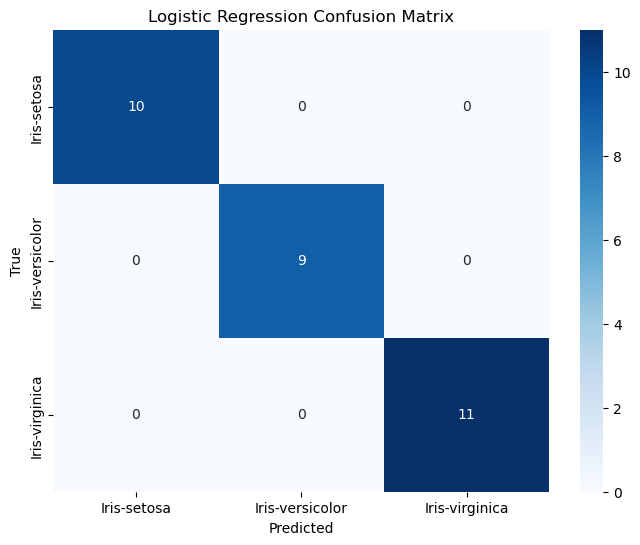

In [18]:
plt.figure(figsize=(8, 6))

sns.heatmap(log_reg_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

This graphical representation aids in understanding how well the Logistic Regression model is performing, showing the true positive, true negative, false positive, and false negative predictions.

### Display sample predictions

To showcase sample predictions using different sepal and petal lengths and widths, I have created a new DataFrame with custom values and used the trained Logistic Regression model to predict the corresponding flower species.

In [19]:
# Create a DataFrame with custom sepal and petal lengths and widths
custom_data = {
    "SepalLengthCm": [5.0, 6.5, 4.8, 7.2],
    "SepalWidthCm": [3.2, 3.0, 2.8, 3.5],
    "PetalLengthCm": [1.5, 5.5, 3.0, 6.0],
    "PetalWidthCm": [0.5, 2.0, 1.2, 2.5]
}

# Convert custom data to DataFrame
custom_df = pd.DataFrame(custom_data)

# Predict using the trained Logistic Regression model
custom_predictions = log_reg_model.predict(custom_df)

# Decode numerical predictions to flower species
decoded_predictions = le.inverse_transform(custom_predictions)

# Convert the decoded predictions to categorical form
categorical_predictions = pd.Categorical(decoded_predictions, categories=le.classes_)

# Display the predictions
predictions_df = pd.DataFrame({"SepalLengthCm": custom_df["SepalLengthCm"],
                                "SepalWidthCm": custom_df["SepalWidthCm"],
                                "PetalLengthCm": custom_df["PetalLengthCm"],
                                "PetalWidthCm": custom_df["PetalWidthCm"],
                                "Predicted Species": categorical_predictions})

print(predictions_df)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Predicted Species
0            5.0           3.2            1.5           0.5       Iris-setosa
1            6.5           3.0            5.5           2.0    Iris-virginica
2            4.8           2.8            3.0           1.2   Iris-versicolor
3            7.2           3.5            6.0           2.5    Iris-virginica


In the final stages of the project, I conducted sample predictions using the trained Logistic Regression model. Utilizing custom data featuring distinct sepal and petal dimensions, the model accurately predicted the corresponding Iris species. The predictions were presented in a categorical format, providing a practical demonstration of the model's applicability and effectiveness in real-world scenarios.

### Conclusion

After implementing and evaluating the Logistic Regression model on the Iris dataset, it is evident that the model performs exceptionally well. With high accuracy, precision, and recall scores, the Logistic Regression model effectively classifies Iris flowers based on their sepal and petal dimensions. The confusion matrix visualization further enhances the understanding of the model's predictive capabilities. Considering its simplicity and robust performance, Logistic Regression stands out as a reliable choice for the Iris flower classification task, demonstrating its suitability for similar applications requiring precise and interpretable predictions.

## Task 2: Conduct a Simple Exploratory Data Analysis (EDA) to gain insights into the dataset

- Perform a basic EDA to understand the structure and characteristics of the Iris dataset.
- Explore the distribution of each feature in the dataset.
- Create visualizations such as histograms, box plots, or scatter plots to highlight relationships between features.

### Import necessary libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
iris_df = pd.read_csv('Iris.csv')

In [22]:
# Drop the 'Id' column as it is not needed
iris_df = iris_df.drop("Id", axis=1)

In [23]:
# Set the style for the visualizations
sns.set(style="whitegrid")

### Exploratory Data Analysis

#### Pairplots

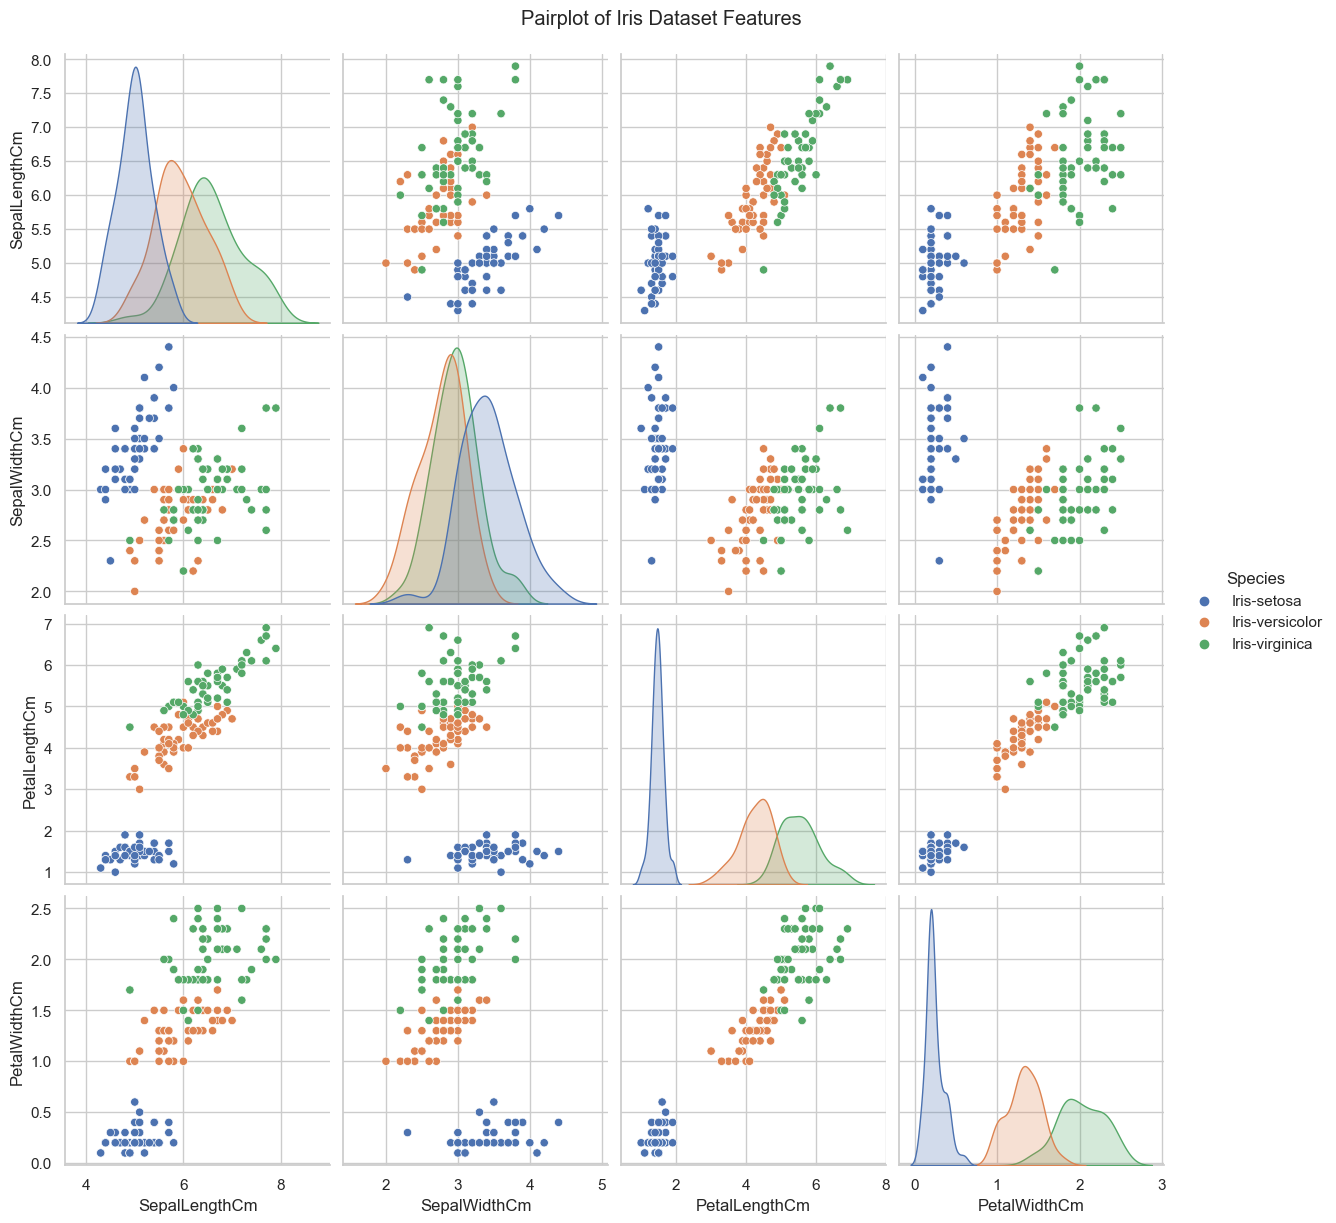

In [24]:
# Pairplot for overall feature distribution and relationships
sns.pairplot(iris_df, hue="Species", height=3)
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

- Observation: The pairplot visually represents the relationships between pairs of features. Each species is color-coded, making it easy to distinguish between them.
- Conclusion: Sepal and petal measurements for Iris-setosa are notably different from Iris-versicolor and Iris-virginica. There is a clear separation between species, indicating that these features can be effective in distinguishing them.

#### Histograms

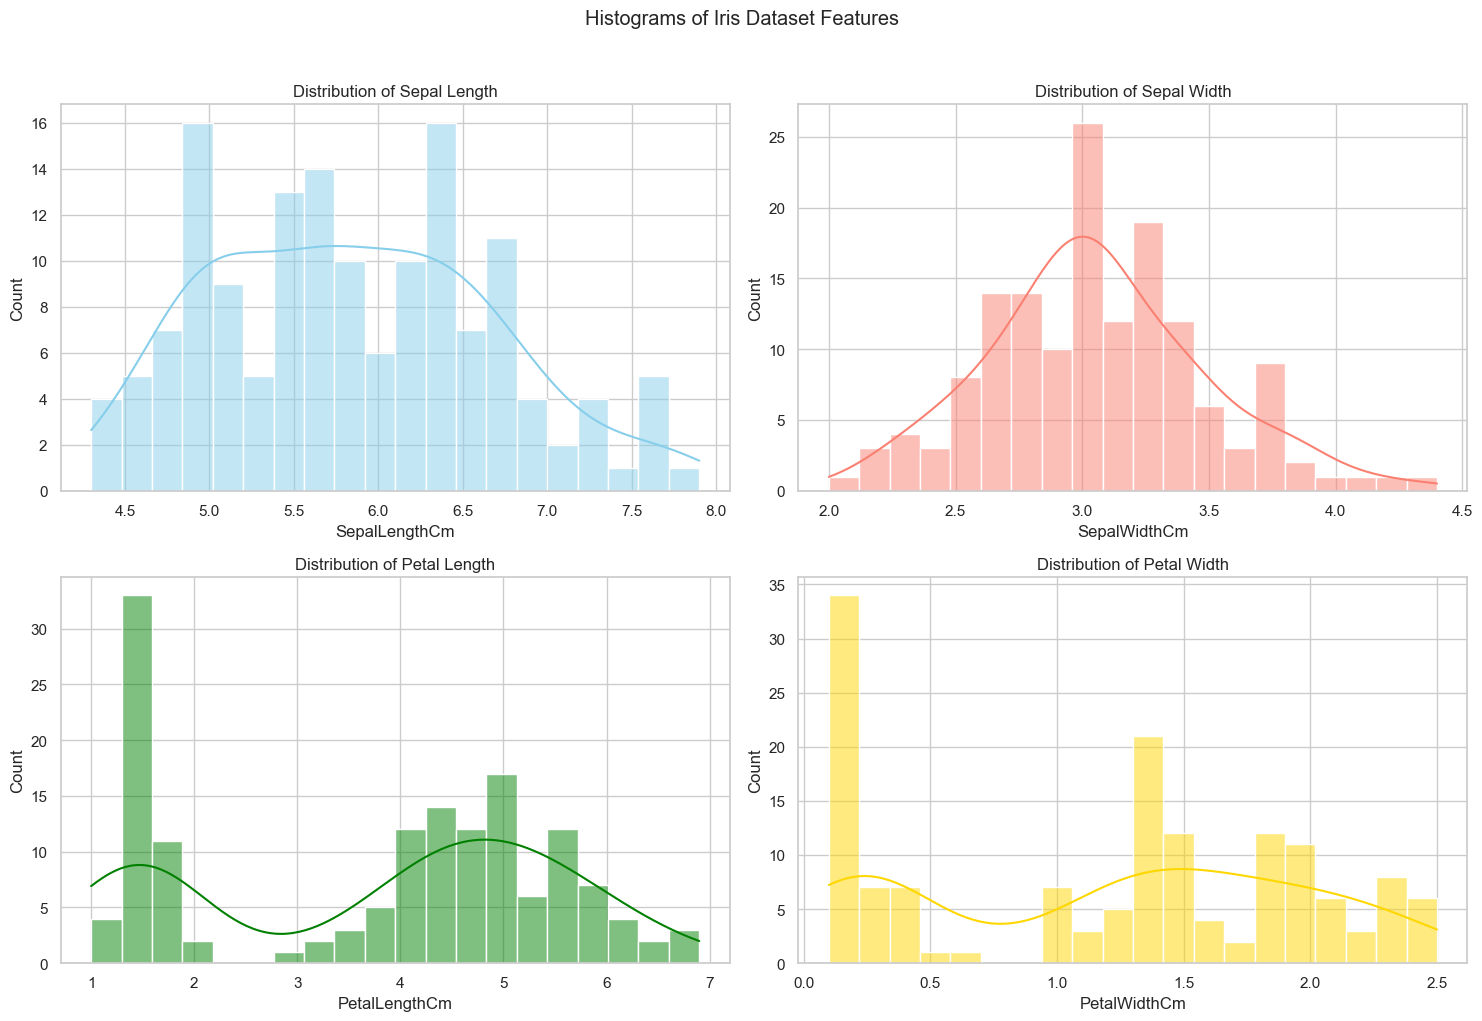

In [25]:
# Histograms for individual feature distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(iris_df["SepalLengthCm"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Sepal Length")

plt.subplot(2, 2, 2)
sns.histplot(iris_df["SepalWidthCm"], kde=True, bins=20, color="salmon")
plt.title("Distribution of Sepal Width")

plt.subplot(2, 2, 3)
sns.histplot(iris_df["PetalLengthCm"], kde=True, bins=20, color="green")
plt.title("Distribution of Petal Length")

plt.subplot(2, 2, 4)
sns.histplot(iris_df["PetalWidthCm"], kde=True, bins=20, color="gold")
plt.title("Distribution of Petal Width")

plt.suptitle("Histograms of Iris Dataset Features", y=1.02)
plt.tight_layout()
plt.show()

- Observation: Histograms display the distribution of each feature individually.
- Conclusion: Sepal Length and Sepal Width have relatively normal distributions. Petal Length and Petal Width show clear distinctions, especially in the case of Iris-setosa, suggesting that these features can be discriminative.

#### Box plots

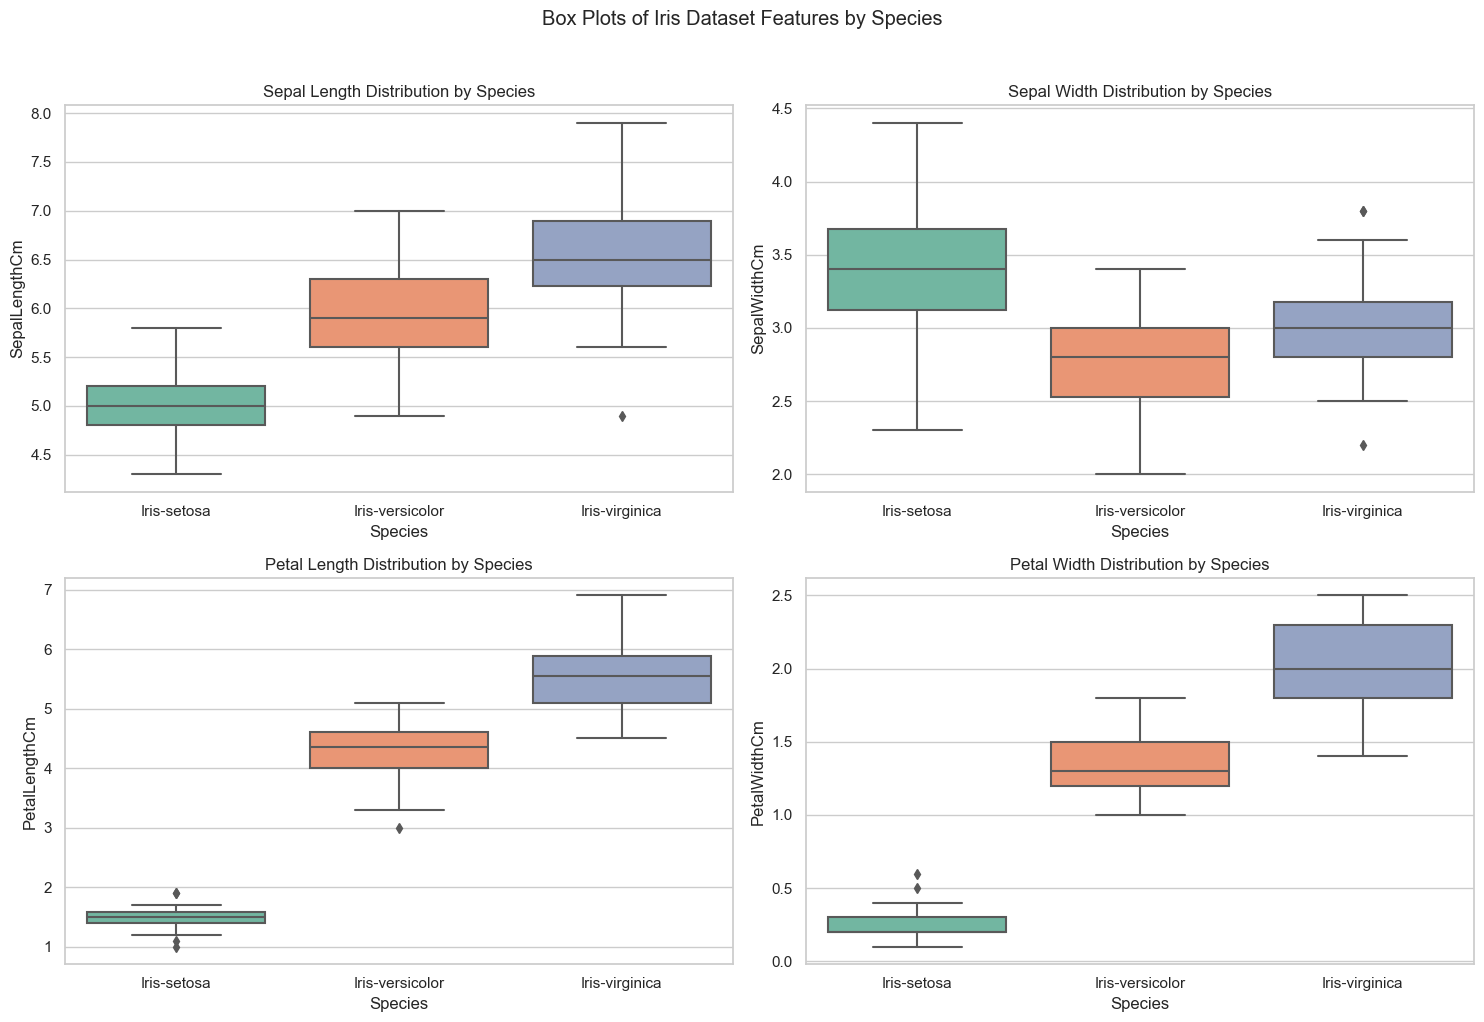

In [26]:
# Box plots for individual feature distribution by species
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="SepalLengthCm", data=iris_df, palette="Set2")
plt.title("Sepal Length Distribution by Species")

plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="SepalWidthCm", data=iris_df, palette="Set2")
plt.title("Sepal Width Distribution by Species")

plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_df, palette="Set2")
plt.title("Petal Length Distribution by Species")

plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="PetalWidthCm", data=iris_df, palette="Set2")
plt.title("Petal Width Distribution by Species")

plt.suptitle("Box Plots of Iris Dataset Features by Species", y=1.02)
plt.tight_layout()
plt.show()

- Observation: Box plots illustrate the distribution of each feature by species.
- Conclusion: Sepal Length and Petal Length are higher for Iris-virginica compared to the other species. Iris-setosa tends to have a smaller Sepal Width and shorter Petal Width. These visualizations highlight the variability between species.

#### Scatterplots

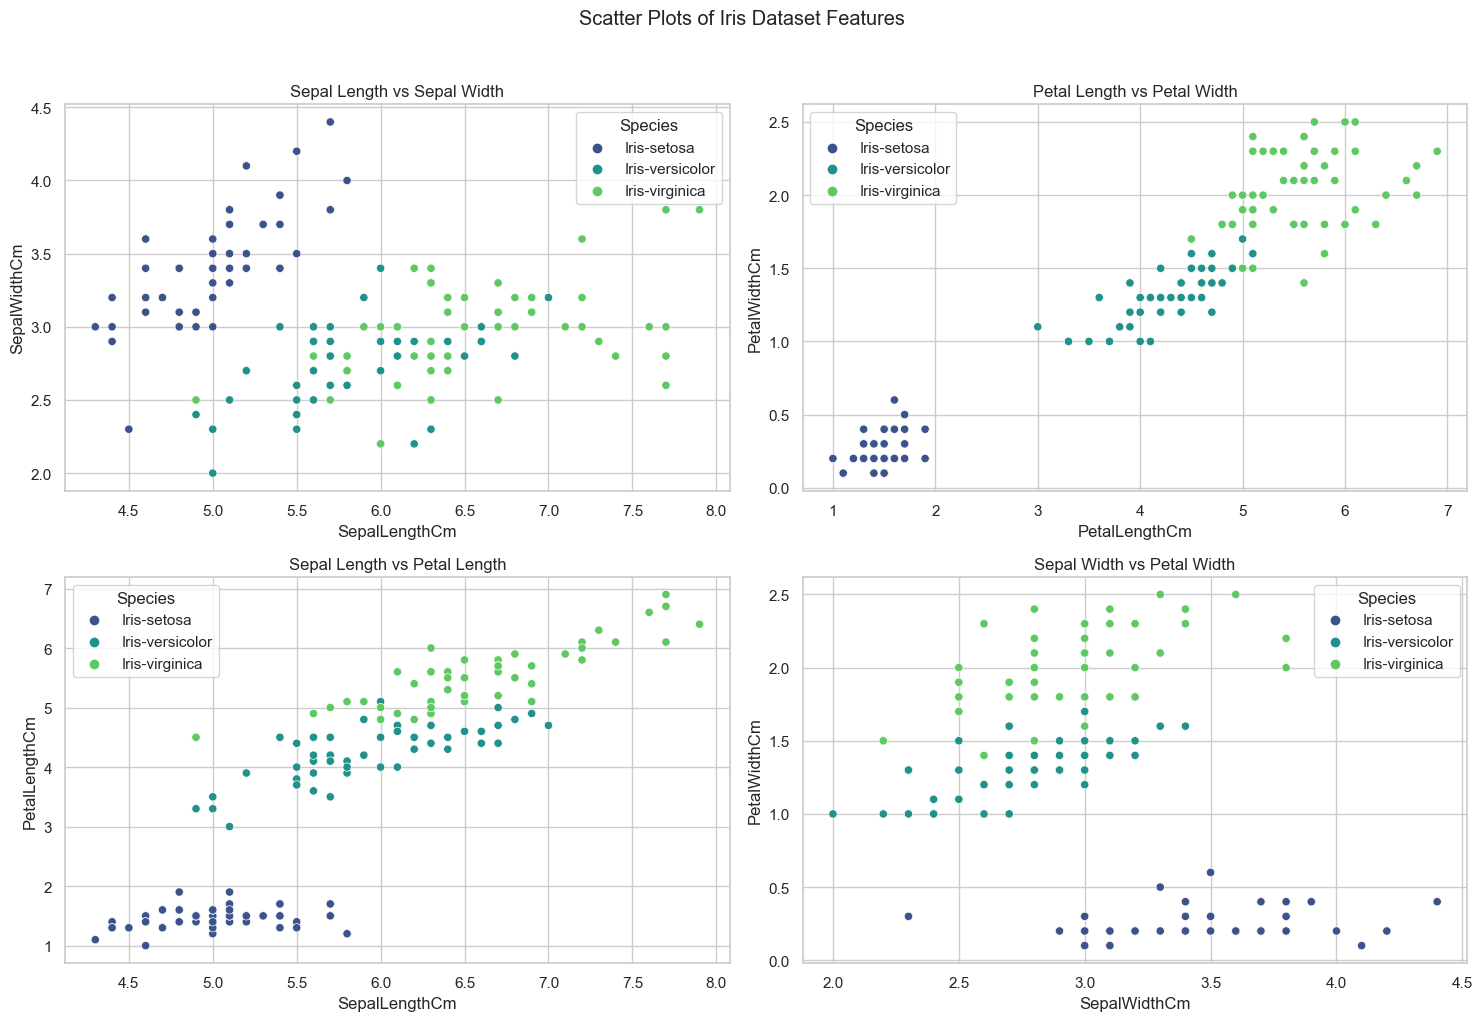

In [27]:
# Scatter plots for feature relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=iris_df, palette="viridis")
plt.title("Sepal Length vs Sepal Width")

plt.subplot(2, 2, 2)
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=iris_df, palette="viridis")
plt.title("Petal Length vs Petal Width")

plt.subplot(2, 2, 3)
sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", hue="Species", data=iris_df, palette="viridis")
plt.title("Sepal Length vs Petal Length")

plt.subplot(2, 2, 4)
sns.scatterplot(x="SepalWidthCm", y="PetalWidthCm", hue="Species", data=iris_df, palette="viridis")
plt.title("Sepal Width vs Petal Width")

plt.suptitle("Scatter Plots of Iris Dataset Features", y=1.02)
plt.tight_layout()
plt.show()

- Observation: Scatter plots reveal the relationships between pairs of features, with each point representing an observation and color denoting the species.
- Conclusion: Sepal Length vs. Sepal Width shows some clustering by species, especially for Iris-setosa. Petal Length vs. Petal Width displays clear separation between species, indicating distinct clusters. Sepal Length vs. Petal Length and Sepal Width vs. Petal Width also show species-specific patterns.

This exploratory data analysis (EDA) of the Iris dataset has provided valuable insights into the structure and characteristics of the data. Through visualizations such as pairplots, histograms, box plots, and scatter plots, we gained a comprehensive understanding of the distribution of features and relationships between them. Notable findings include the distinct patterns in sepal and petal measurements for each species, showcasing the potential for these features to serve as effective discriminators.